In [77]:
import qiskit

In [78]:
from qiskit import QuantumCircuit,QuantumRegister,transpile

In [79]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector


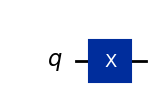

In [80]:

qc_x = QuantumCircuit(1)


#State1 = Statevector(qc_x)
#plot_bloch_multivector(State1)


qc_x.x(0)
#qc_x.save_statevector
#qc_x.save_unitary()
qc_x.draw('mpl')


the quantum state is:  Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


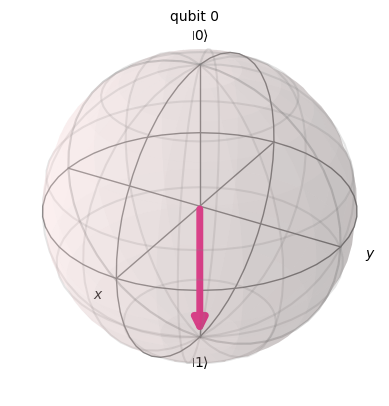

In [81]:
state = Statevector(qc_x)
print('the quantum state is: ', state)
plot_bloch_multivector(state)

Visualizing unitary matrix of a circuit

In [82]:

import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator

# Construct quantum circuit without measure
circ = QuantumCircuit(1)
circ.x(0)
circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
# Another option to create the simulator
# simulator = AerSimulator(method = 'unitary')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


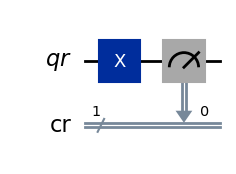

In [83]:
from qiskit import ClassicalRegister, QuantumRegister

cr_x = ClassicalRegister(1, "cr")
qr_x = QuantumRegister(1, "qr")
qc_x = QuantumCircuit(qr_x, cr_x)

qc_x.x(qr_x[0])

qc_x.measure(0,0) #first one go to classical and second go to quantum 


qc_x.draw('mpl')

In [84]:
backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc_x, shots = 1000)

result = job.result()

counts = result.get_counts(qc_x)

print("\nTotal counts are : ", counts)




Total counts are :  {'1': 1000}


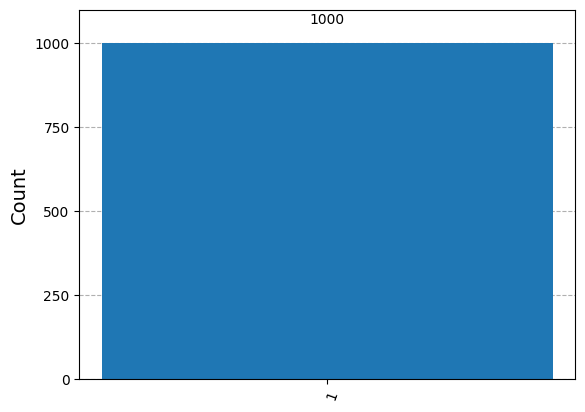

In [85]:
plot_histogram(counts)

Measuring using classical bits

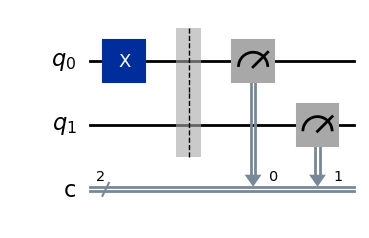

In [86]:
qc_x = QuantumCircuit(2,2, name="qc")
qc_x.x(0)
qc_x.barrier()
qc_x.measure(0,0) #first qubit goes to the first classical bit
qc_x.measure(1,1)

#qc_x.measure([0,1], [0,1])

qc_x.draw('mpl')

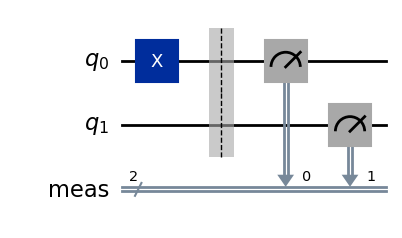

In [87]:
qc = QuantumCircuit(2, name ='qc')
qc.x(0)

qc.measure_all()
qc.draw('mpl')